# Intro to Pandas

- Pandas is a software library written for the Python programming language for data manipulation and analysis. 
- In particular, it offers data structures and operations for manipulating numerical tables and time series.
- The tools resemble those available in R. Many of the operations are identical to those found in a database. 
- While a database would be more efficient for large datasets, Pandas is very fast for datasets that can fit in memory.

 

In [1]:
# import the pandas library, aliased as 'pd'
import pandas as pd

## Loading data

- If you haven't done so already, download the
<a href="http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip">Lahman Baseball dataset</a>.
- Note that you can find information about the meaning of the columns and the data in the `readme.txt` file.

In [2]:
# Specify the correct path to the folder in `path_to_data`.
path_to_data = '/Users/ruben/Downloads/lahman-csv_2014-02-14/'

In [3]:
# Loading the Baseball datasets
master = pd.read_csv(path_to_data + 'Master.csv')
batting = pd.read_csv(path_to_data + 'Batting.csv')

## Exercises

- Load the dataset `Salaries.csv` with `pd.read_csv`.

In [4]:
salaries = pd.read_csv(path_to_data + 'Salaries.csv')

- Join the Salaries table with the `master` table.

In [5]:
master_w_salaries = master.merge(salaries, how='left', on='playerID')

- How many players are missing salary information?

In [6]:
master_w_salaries.salary.isnull().sum()

13686

- Filter to just the player and position column and produce the average salary by position for all years?

In [7]:
# Apologies for the confusing formulation of the questions. 
# Player's positions can be found in the file `Fielding.csv`
fielding = pd.read_csv(path_to_data + 'Fielding.csv')

In [8]:
fielding.head(1)

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,ansonca01,1871,1,RC1,NaN,1B,1,NaN,NaN,7,0,0,0,NaN,NaN,NaN,NaN,NaN


In [10]:
# Let's look at the salaries dataset
salaries.head(1)

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819


In [11]:
# Since the question is a little confusing, let's try it the easy way first
fielding.merge(salaries, on='playerID').groupby('POS').salary.mean()

POS
1B     2417939
2B     1573435
3B     1909720
C      1538667
CF     2247814
DH     2813475
LF     1971455
OF     2301706
P      2098016
RF     2142283
SS     1982200
Name: salary, dtype: int64

In [12]:
# Now, I think there's a little bit more going on. It seems that you might want to join on more fields,
# since a player's salary is not constant, but can differ by year, and maybe also differs per team, etc.

In [13]:
# Let's check that: does a player have one salary in a given year, or more?
s = salaries.groupby(['playerID', 'yearID']).salary.nunique()
s[s > 1].head()

playerID   yearID
anderla02  1986      2
barkele01  1987      2
bereja01   1998      2
berrada01  1987      2
berryda01  1995      2
Name: salary, dtype: int64

In [14]:
# Obviously a player can have more than one salary in a given year.
# Let's merge the datasets on more keys, then!

In [15]:
fielding.merge(salaries, on=['playerID', 'yearID', 'lgID', 'teamID']).groupby('POS').salary.mean()

POS
1B     2077062
2B     1269145
3B     1466911
C      1279893
CF     1635721
DH     2428725
LF     1480544
OF     1743102
P      1725323
RF     1622889
SS     1429480
Name: salary, dtype: int64

- Produce the total salary by each team in 2013.

In [28]:
salaries[salaries.yearID == 2013].groupby('teamID').salary.sum()

teamID
ARI        90132000
ATL        87871525
BAL        84393333
BOS       151530000
CHA       120065277
CHN       100567726
CIN       106404462
CLE        75771800
COL        74409071
DET       145989500
HOU        17890700
KCA        80091725
LAA       124174750
LAN       223362196
MIA        33601900
MIL        76947033
MIN        75337500
NYA       231978886
NYN        49448346
OAK        60132500
PHI       169863189
PIT        77062000
SDN        65585500
SEA        74005043
SFN       140180334
SLN        92260110
TBA        52955272
TEX       112522600
TOR       126288100
WAS       113703270
Name: salary, dtype: int64

- Join on the batting statistics to this table as well.

In [30]:
batting.head(1)

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,11,0,0,0,...,0,0,0,0,0,0,0,0,0,11


In [32]:
salaries_w_batting = salaries.merge(batting, on=['playerID', 'yearID', 'lgID', 'teamID'])

#### Visualizations (optional)

In case you are already familiar with `matplotlib` (see notebook *Visualizations*).
- Produce a histogram of player salaries.

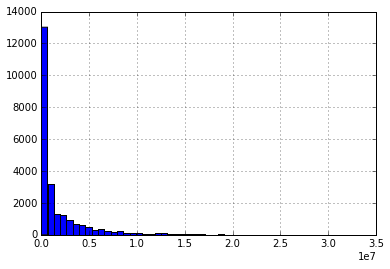

In [45]:
%matplotlib inline
# For each player, sum all his salaries in a given year, so we get his total annual salary
player_annual_salaries = salaries.groupby(['playerID', 'yearID']).salary.sum()
f = player_annual_salaries.hist(bins=50)

- Plot salary against a few statistics of the batting statistics (HR, RBI, R) - are any of these well-correlated?

In [68]:
# Note that R = # runs

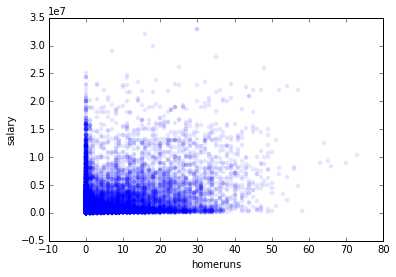

In [82]:
from matplotlib import pyplot as plt
f = plt.scatter(salaries_w_batting.HR, salaries_w_batting.salary, linewidths=0, alpha=.1)
f = plt.xlabel('homeruns'), plt.ylabel('salary')

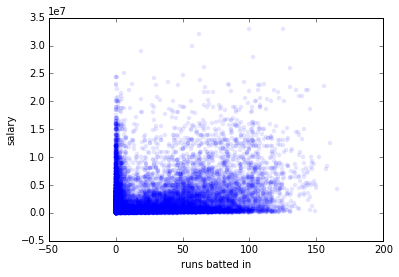

In [83]:
f = plt.scatter(salaries_w_batting.RBI, salaries_w_batting.salary, linewidths=0, alpha=.1)
f = plt.xlabel('runs batted in'), plt.ylabel('salary')

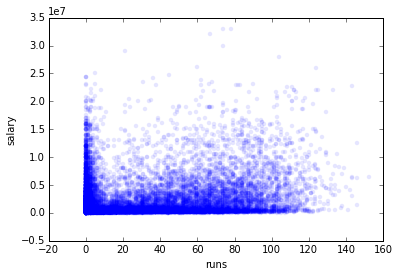

In [84]:
f = plt.scatter(salaries_w_batting.R, salaries_w_batting.salary, linewidths=0, alpha=.1)
f = plt.xlabel('runs'), plt.ylabel('salary')

In [85]:
# Let's look at all annual statistics per player, per year: total salary, # HRs, RBI, Rs
stats_pay = salaries_w_batting[['playerID', 'yearID', 'salary', 'HR', 'RBI', 'R']] \
    .groupby(['playerID', 'yearID']).sum()

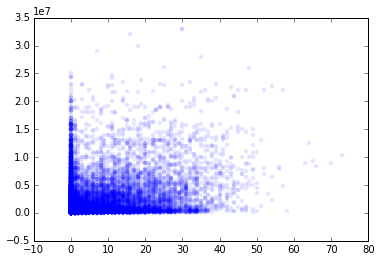

In [86]:
f = plt.scatter(stats_pay.HR, stats_pay.salary, linewidths=0, alpha=.1)

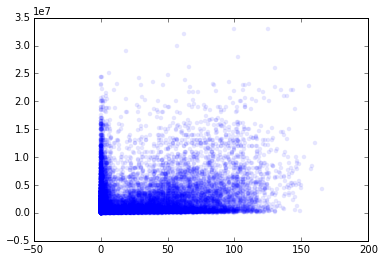

In [87]:
f = plt.scatter(stats_pay.RBI, stats_pay.salary, linewidths=0, alpha=.1)

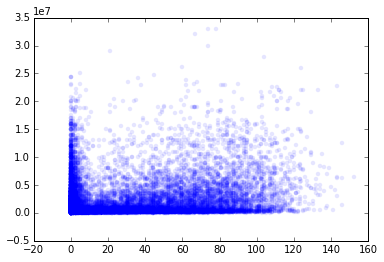

In [88]:
f = plt.scatter(stats_pay.R, stats_pay.salary, linewidths=0, alpha=.1)

Not really convincing. Let's try some averages

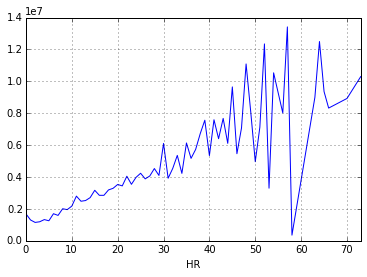

In [89]:
s = salaries_w_batting.groupby('HR').salary.mean()
f = s.plot()

Hey, so on average, we see an increase in salary for the players with more homeruns

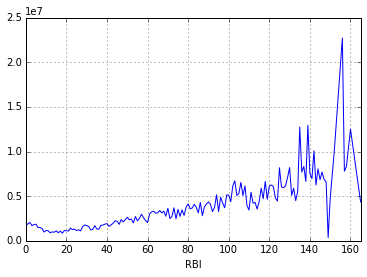

In [90]:
s = salaries_w_batting.groupby('RBI').salary.mean()
f = s.plot()

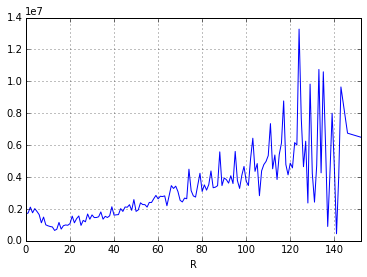

In [91]:
s = salaries_w_batting.groupby('R').salary.mean()
f = s.plot()

## Further Reading

- <a href="http://pandas.pydata.org/pandas-docs/stable/10min.html" target="_blank">10 Minutes to Pandas</a> and
<a href="http://pandas.pydata.org/pandas-docs/stable/tutorials.html" target="_blank">tutorials</a>
of the official documentation. 
- Also recommended is the book <i>Python for Data Analysis</i>, O'Reilly Media.
- <a href="http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/" target="_blank">
Pandas and the MoviesLens Dataset</a>, comparing pandas with SQL.